# Pricing under RI w/o Endogenous Feedback

This document goes through a couple of examples for solving pricing under rational inattention without endogenous feedback using the [DRIPs](https://github.com/afrouzi/DRIPs.jl) package.

See [Afrouzi and Yang (2020)](http://www.afrouzi.com/dynamic_inattention.pdf) for background on the theory.

## Contents
* Ex. 1A: One Shock Case
    * Initialization
    * Solution
    * Measure Performance
    * IRFs
* Ex. 1B: Two Shocks Case
    * Initialization
    * Solution
    * Measure Performance
    * IRFs

## Ex. 1A: One Shock Case
There is a measure of firms indexed by $i\in[0,1]$. Firm $i$ chooses its price $p_{i,t}$ at time $t$ to track its ideal price $p_{i,t}^*$. Formally, her flow profit is
    $$-(p_{i,t}-p_{i,t}^*)^2$$

We start by assuming that $p_{i,t}^*=q_t$ where
$$
\begin{aligned}
    \Delta q_t&=\rho \Delta q_{t-1}+u_t,\quad u_t\sim \mathcal{N}(0,\sigma_u^2)
\end{aligned}
$$
Here $q_t$ can be interpreted as money growth or the nominal aggregate demand. Therefore, the state-space representation of the problem is

$$
\begin{aligned}
   \vec{x}_{t}&=\left[\begin{array}{c}
    q_{t}\\
    \Delta q_{t}
    \end{array}\right]
    = \underset{\mathbf{A}}{\underbrace{\left[\begin{array}{cc}
    1 & \rho \\
    0 & \rho \\
    \end{array}\right]}}\, \vec{x}_{t-1}
    + \underset{\mathbf{Q}}{\underbrace{\left[\begin{array}{c}
    \sigma_u  \\
    \sigma_u \\
    \end{array}\right]}}\, u_t, \\
    p_{i,t}^*&=\underset{\mathbf{H}}{\underbrace{\left[\begin{array}{c}
    1 \\
    0 \\
    \end{array}\right]}}'\vec{x}_t
\end{aligned}
$$

### Initialization
Include the package:

In [1]:
using DRIPs;

Assign value to deep parameters and define the structure of the problem

In [2]:
ρ   = 0.6;        #persistence of money growth
σ_u = 1;          #std. deviation of shocks to money growth

Primitives of the DRIP:

In [3]:
ω   = 100;
β   = 0.96^0.25;
A   = [1 ρ; 0 ρ];
Q   = σ_u*[1; 1];
H   = [1; 0];

### Solution

In [4]:
ex1 = Drip(ω,β,A,Q,H);

### Measure Performance

In [5]:
using BenchmarkTools;
@benchmark Drip(ω,β,A,Q,H) setup = (ω = 100*rand()) # solves and times the function for a random set of ω's

BenchmarkTools.Trial: 
  memory estimate:  63.48 KiB
  allocs estimate:  618
  --------------
  minimum time:     36.970 μs (0.00% GC)
  median time:      116.594 μs (0.00% GC)
  mean time:        129.973 μs (10.61% GC)
  maximum time:     15.583 ms (98.63% GC)
  --------------
  samples:          10000
  evals/sample:     1

### IRFs

In [6]:
ex1irfs = irfs(ex1, T = 20);

Let's plot how the average price $p=\int_0^1 p_{i,t}di$ responds to a shock to money growth:

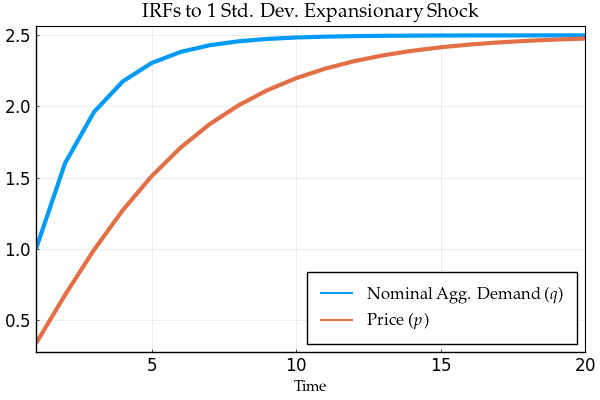

In [7]:
using Plots, LaTeXStrings; pyplot();
plot(1:ex1irfs.T,[ex1irfs.x[1,1,:],ex1irfs.a[1,1,:]],
    xlabel     = "Time",
    label      = [L"Nominal Agg. Demand ($q$)" L"Price ($p$)"],
    title      = "IRFs to 1 Std. Dev. Expansionary Shock",
    xlim       = (1,ex1irfs.T),
    lw         = 3,
    legend     = :bottomright,
    legendfont = font(12),
    tickfont   = font(12),
    framestyle = :box)

We can also plot the IRFs of inflation $\pi_t\equiv p_t-p_{t-1}$ and output $y_t\equiv q_t-p_t$ to 1 percent expansionary shock to $q$:

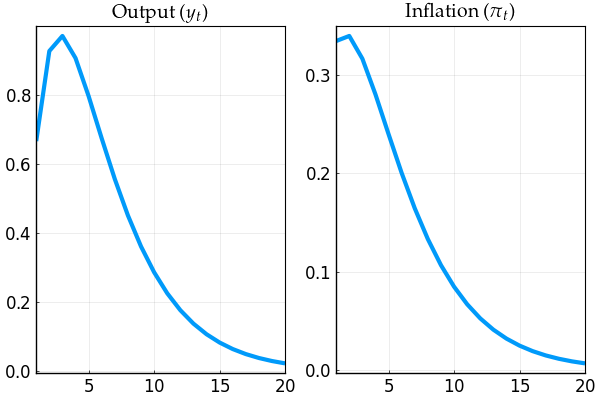

In [8]:
p1 = plot(1:ex1irfs.T,ex1irfs.x[1,1,:]-ex1irfs.a[1,1,:],
    title  = L"Output ($y_t$)")

p2 = plot(1:ex1irfs.T,[ex1irfs.a[1,1,1];ex1irfs.a[1,1,2:end]-ex1irfs.a[1,1,1:end-1]],
    title  = L"Inflation ($\pi_t$)")

plot(p1,p2,
    layout     = (1,2),
    xlim       = (1,ex1irfs.T),
    lw         = 3,
    legend     = false,
    tickfont   = font(12),
    framestyle = :box)

## Ex. 1B: Two Shocks Case
Suppose now that $p_{i,t}^*=q_t-z_{t}$ where
$$
\begin{aligned}
    \Delta q_t&=\rho \Delta q_{t-1}+u_t,\quad u_t\sim \mathcal{N}(0,\sigma_u^2) \\
    z_{t}&\sim \mathcal{N}(0,\sigma_z^2)
\end{aligned}
$$
Here $q_t$ can be interpreted as money growth and $z_{i,t}$ as an idiosyncratic TFP shock. Therefore,
$$
\begin{aligned}
   \vec{x}_{t}&=\left[\begin{array}{c}
    q_{t}\\
    \Delta q_{t} \\
    z_{t}
    \end{array}\right]
    = \underset{\mathbf{A}}{\underbrace{\left[\begin{array}{ccc}
    1 & \rho & 0\\
    0 & \rho & 0\\
    0 & 0 & 0 \\
    \end{array}\right]}}\, \vec{x}_{t-1}
    + \underset{\mathbf{Q}}{\underbrace{\left[\begin{array}{cc}
    \sigma_u & 0 \\
    \sigma_u & 0 \\
    0 & \sigma_z   \\
    \end{array}\right]}}\, \left[\begin{array}{c}
    u_t  \\
    z_{t}   \\
    \end{array}\right], \\
    p_{i,t}^*&=\underset{\mathbf{H}}{\underbrace{\left[\begin{array}{c}
    1     \\
    0 \\
    -1 \\
    \end{array}\right]}}'\vec{x}_{t}
\end{aligned}
$$

### Initialization
Assign values:

In [9]:
ρ   = 0.6;        #persistence of money growth
σ_u = 1;          #std. deviation of shocks to money growth
σ_z = √10;      #std. deviation of idiosyncratic shock

Specifying the primitives of the drip

In [10]:
ω   = 100;
β   = 0.96^0.25;
A   = [1 ρ 0; 0 ρ 0; 0 0 0];
Q   = [σ_u 0; σ_u 0; 0 σ_z];
H   = [1; 0; -1];

### Solution

In [11]:
ex2  = Drip(ω,β,A,Q,H);

### Measure Performance

In [12]:
@benchmark Drip(ω,β,A,Q,H) setup = (ω = 100*rand()) # solves and times the function for a random set of ω's

BenchmarkTools.Trial: 
  memory estimate:  110.42 KiB
  allocs estimate:  784
  --------------
  minimum time:     105.368 μs (0.00% GC)
  median time:      274.126 μs (0.00% GC)
  mean time:        306.534 μs (11.66% GC)
  maximum time:     27.912 ms (98.40% GC)
  --------------
  samples:          10000
  evals/sample:     1

### IRFs

In [13]:
ex2irfs = irfs(ex2, T = 20);

To get the IRFs simply use the law of motion for actions:

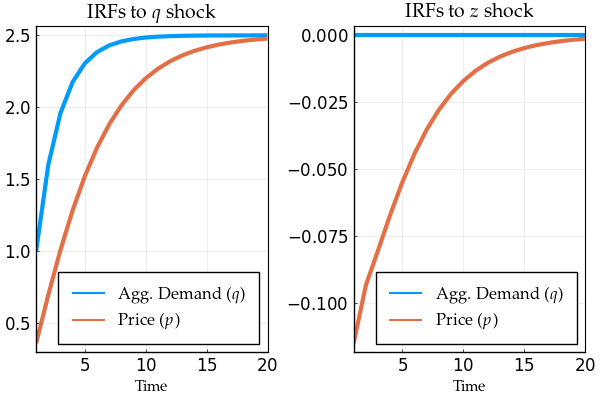

In [14]:
p1 = plot(1:ex2irfs.T,[ex2irfs.x[1,1,:],ex2irfs.a[1,1,:]],
    title  = L"IRFs to $q$ shock");
p2 = plot(1:ex1irfs.T,[ex2irfs.x[1,2,:],ex2irfs.a[1,2,:]],
    title  = L"IRFs to $z$ shock");

plot(p1,p2, layout = (1,2),
    xlabel     = "Time",
    label      = [L"Agg. Demand ($q$)" L"Price ($p$)"],
    xlim       = (1,ex2irfs.T),
    lw         = 3,
    legend     = :bottomright,
    legendfont = font(12),
    tickfont   = font(12),
    framestyle = :box)

More IRFs:

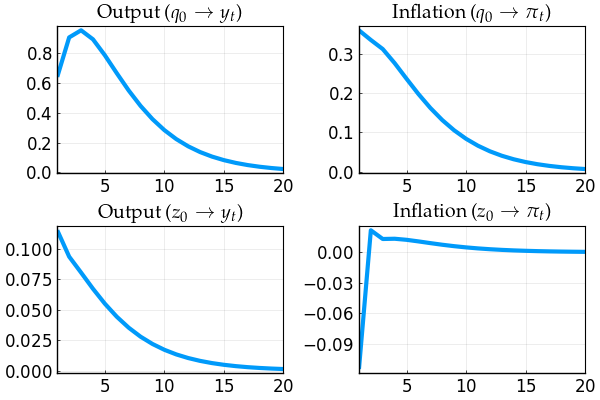

In [15]:
p1 = plot(1:ex2irfs.T,ex2irfs.x[1,1,:]-ex2irfs.a[1,1,:],
    title  = L"Output ($q_0\to y_t$)");

p2 = plot(1:ex2irfs.T,[ex2irfs.a[1,1,1];ex2irfs.a[1,1,2:end]-ex2irfs.a[1,1,1:end-1]],
    title  = L"Inflation ($q_0\to \pi_t$)")

p3 = plot(1:ex2irfs.T,ex2irfs.x[1,2,:]-ex2irfs.a[1,2,:],
    title  = L"Output ($z_0\to y_t$)");

p4 = plot(1:ex2irfs.T,[ex2irfs.a[1,2,1];ex2irfs.a[1,2,2:end]-ex2irfs.a[1,2,1:end-1]],
    title  = L"Inflation ($z_0\to \pi_t$)")

plot(p1,p2,p3,p4, layout = (2,2),
    xlim       = (1,ex2irfs.T),
    lw         = 3,
    legend     = false,
    tickfont   = font(12),
    framestyle = :box)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*